<a href="https://colab.research.google.com/github/LeoAlvarengaDev/Analise_De_Dados_Com_Python_Pandas-Anima-2023/blob/main/Segundo_Exemplo_Em_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Segundo exemplo de manipulação de dados usando Python Pandas 
Veremos inserção de dados, remoção de colunas, merge, gráficos

Autor: Henrique Poyatos e galera

Data: 9 e 10 de fevereiro de 2023

In [2]:
import pandas as pd

combustiveis_df = pd.read_excel("ca202102_20230207120945.xlsx")


In [ ]:
#Inserção simples de dado
combustiveis_df['Ativo'] = True

display(combustiveis_df.head())

In [ ]:
# Criar uma coluna "Obs" que tenha nela escrito "MELHOR CIDADE" quando a coluna Municipio for igual a SAO PAULO
combustiveis_df['Obs'] = ["MELHOR CIDADE" if municipio == 'SAO PAULO' else None for municipio in combustiveis_df['Municipio']]
display(combustiveis_df.loc[combustiveis_df['Municipio'].isin(['SAO PAULO','INDAIATUBA', 'CAMPINAS', 'SALTO']), ['Municipio', 'Obs']])

In [ ]:
# (por Leandro Rodrigues)
# como preencher uma coluna 'Valor de Venda - Status' que verifica o seguinte:
# se o valor de venda for maior que 6,5 reais, ele fala que tá Caro..caso contrário, está barato
import numpy as np

combustiveis_df['Status do Valor de Venda'] = np.where(combustiveis_df['Valor de Venda'] > 6.5, 'Caro', 'Barato')
display(combustiveis_df[['Revenda', 'Valor de Venda', 'Status do Valor de Venda']])

In [ ]:
# Calcular postos de gasolina por habitante temos na amostragem de 
# combustiveis nov/2021

num_habitantes_df = pd.read_csv("ibge_num_habitantes_estimado.csv", sep=";")
display(num_habitantes_df)

In [ ]:
# Calcular postos de gasolina por habitante temos na amostragem de 
# combustiveis nov/2021

num_habitantes_df = pd.read_csv("ibge_num_habitantes_estimado.csv", sep=";")
num_habitantes_df.rename(columns={"Estado":"Estado - Sigla"}, inplace=True)
display(num_habitantes_df)

In [ ]:
# Faz um MERGE dos dois dataframes
colunas = ['Municipio', 'Estado - Sigla']
merge_df = combustiveis_df.merge(num_habitantes_df, how="inner", on=colunas)
display(merge_df)
print(merge_df.info())

In [ ]:
#Destruir coluna completamente vazia (todas as linhas são nulas)
merge_df.dropna(axis='columns', inplace=True)
print(merge_df.info())

In [ ]:
colunas=['Regiao - Sigla', 'Nome da Rua', 'Numero Rua', 
         'Bairro', 'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda',
         'Unidade de Medida', 'Bandeira', 'Ativo', 'Status do Valor de Venda']
merge_df.drop(labels=colunas, axis=1, inplace=True)
print(merge_df.info())

In [ ]:
# Remover a linhas duplicadas
merge_df.drop_duplicates(inplace=True)
display(merge_df.head(100))

In [ ]:
#Agrupar e contar quantos postos tem na cidade..
postos_por_municipio_df = merge_df.groupby(by=['Estado - Sigla', 'Municipio', 'NumHabitantes2021']).count()
postos_por_municipio_df.drop('CNPJ da Revenda', axis=1, inplace=True)
postos_por_municipio_df.rename(columns={"Revenda": "Número de Postos"}, inplace=True)
display(postos_por_municipio_df)

In [ ]:
#AQUI O FINAL ESTÁ COM PROBLEMA

#Agrupar e contar quantos postos tem na cidade..
postos_por_municipio_df = merge_df.groupby(by=['Estado - Sigla', 'Municipio', 'NumHabitantes2021']).count()
postos_por_municipio_df.reset_index(inplace=True)
#display(postos_por_municipio_df.info())
postos_por_municipio_df.drop('CNPJ da Revenda', axis=1, inplace=True)
postos_por_municipio_df.rename(columns={"Revenda": "NumPostos"}, inplace=True)

postos_por_municipio_df['PostosPorHabitante'] = postos_por_municipio_df['NumHabitantes2021'] / postos_por_municipio_df['NumPostos'] 
display(postos_por_municipio_df.info())
display(postos_por_municipio_df)

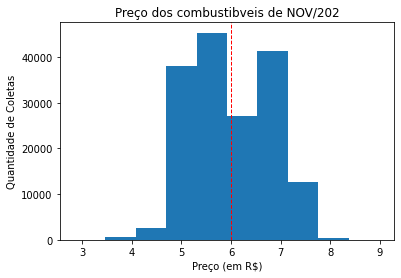

In [36]:
import matplotlib.pyplot as plt

plt.hist(combustiveis_df['Valor de Venda'])

# Colocando um titulo
plt.title("Preço dos combustibveis de NOV/202")

#colocando os rotulos das colunas x e y

plt.xlabel('Preço (em R$)')
plt.ylabel('Quantidade de Coletas')

# Traca um linha vermelha traçejada com o preço medio

plt.axvline(combustiveis_df['Valor de Venda'].mean(), color = 'red', linestyle ='dashed', linewidth = 1)

# Para plota o grafico
plt.show()

In [ ]:
import seaborn as sns

#Segundo Grafico
c_mean = combustiveis_df['Valor de Venda'].groupby(by=combustiveis_df['Produto']).mean()


#Definir a area do grafico
plt.figure(figsize=(10,5))
c_mean.plot(
    kind='barh',
    xlabel  = "Tipo Combustivel",
    ylabel = "Preço reais/Litros",
    title = 'Media de preços por combustivel',
    color = "orange",
    alpha = 0.3,

)

#Grid
plt.grid()

#Remover as linhas superior e lateral direita do gráfico 
sns.despine()

#Exibe
plt.show()

In [63]:
#Vamor personalizar a planilha Excel...
from openpyxl import load_workbook
from openpyxl.styles import PatternFill, Font, Color, Alignment
#c_mean.reset_index(inplace=True)
display(c_mean)

excel = "por_litro.xlsx"
c_mean.to_excel(excel, "Sumário")

Produto
DIESEL                5.375682
DIESEL S10            5.454901
ETANOL                5.456115
GASOLINA              6.708741
GASOLINA ADITIVADA    6.860422
GNV                   4.392935
Name: Valor de Venda, dtype: float64

In [64]:
#Vamor personalizar a planilha Excel...
from openpyxl import load_workbook
from openpyxl.styles import PatternFill, Font, Color, Alignment

#Vai abrir o Excel no openpyxl
wb = load_workbook(excel) # wb = Workbook

#Pegar a planilha certa... usando o Sheet Name (nome da planilha)
ws = wb['Sumário'] 
# Work Sheet -> planilha atual, ativa, de trabalho

#Vamos pintar o cabeçalho da tabela de "cinzinha"
cinzinha = PatternFill("solid", fgColor="CCCCCC")
coords = ['A1', 'B1']
for coord in coords:
  ws[coord].fill = cinzinha

#Onde o preço do combustível for maior ou igual a 6,5 reais (6.5) pinta a fonte
#de vermelho e deixa negrito...
MAX_ROW = ws.max_row
num_linha = 2
while (num_linha <= MAX_ROW):
  coord = 'B'+str(num_linha) #coord="B{0}".format(num_linha)
  if ws[coord].value >= 6.5:
    ws[coord].font = Font(bold=True, color="FF0000")
  num_linha = num_linha + 1
#Salvar o Excel
wb.save(excel)